In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Import csv files
df_white = pd.read_csv('../data/winequality-white.csv')

df_red = pd.read_csv('../data/winequality-red.csv')

In [3]:
#Show dataframe

df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
#Add a column to classify white wines
white_wine = range(0,4898)

df_white['white wine'] = white_wine

In [5]:
#Convert values in white wine column to '1'

df_white['white wine'] = df_white['white wine'] + 1

df_white['white wine'] = df_white['white wine']/df_white['white wine']

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1.0


In [6]:
#Display red wine dataframe

df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#Add a column to classify  wines and convert to integer of '1'
red_wine = range(0,1599)

df_red['red wine'] = red_wine

df_red['red wine'] = df_red['red wine']/df_red['red wine']

In [8]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.0


In [9]:
#Drop NA values
df_red = df_red.dropna()

In [10]:
#combine white and red wine dataframes

combine = pd.concat([df_red,df_white], join='outer', sort=False)

In [11]:
combine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red wine,white wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,NaN
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,NaN,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,NaN,1.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,NaN,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,NaN,1.0


In [12]:
#Fill NA values with integers of '0'
combine = combine.fillna(0)

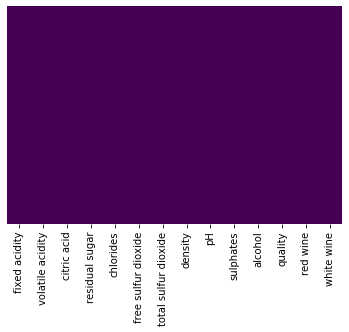

In [13]:
#Check dataframe for NA values

sns.heatmap(combine.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
# sns.countplot(x='quality',hue='white wine', data=combine)

In [15]:
#Count the number of values of each wine type

combine['white wine'].value_counts()

1.0    4898
0.0    1598
Name: white wine, dtype: int64

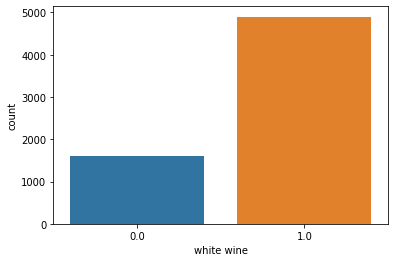

In [16]:
#Display the number of white and red wines in the dataset
sns.countplot(x='white wine',data=combine)

In [17]:
#Show features of dataframe for model selection

combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6496 entries, 1 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6496 non-null   float64
 1   volatile acidity      6496 non-null   float64
 2   citric acid           6496 non-null   float64
 3   residual sugar        6496 non-null   float64
 4   chlorides             6496 non-null   float64
 5   free sulfur dioxide   6496 non-null   float64
 6   total sulfur dioxide  6496 non-null   float64
 7   density               6496 non-null   float64
 8   pH                    6496 non-null   float64
 9   sulphates             6496 non-null   float64
 10  alcohol               6496 non-null   float64
 11  quality               6496 non-null   int64  
 12  red wine              6496 non-null   float64
 13  white wine            6496 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 921.2 KB


In [18]:
#Prepare data for model insertion

X = combine[['pH','alcohol','residual sugar','fixed acidity','density']]
y = combine['white wine']

In [19]:
#import train test split

from sklearn.model_selection import train_test_split

In [20]:
#Split data between training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
#Import Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [22]:
#Instantiate model

logmodel = LogisticRegression()

In [23]:
#Fit model on training data

logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#Make predictions on model

predictions = logmodel.predict(X_test)

In [25]:
#Import library to evaluate the model

from sklearn.metrics import classification_report

In [26]:
#Show classification report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       499
         1.0       0.91      0.94      0.92      1450

    accuracy                           0.88      1949
   macro avg       0.85      0.83      0.84      1949
weighted avg       0.88      0.88      0.88      1949



In [27]:
#save classification report to dataframe

report = classification_report(y_test, predictions, output_dict=True)

class_df = pd.DataFrame(report).transpose().round(2)

class_df.head()

,precision,recall,f1-score,support
0.0,0.79,0.73,0.76,499.00
1.0,0.91,0.94,0.92,1450.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.85,0.83,0.84,1949.00
weighted avg,0.88,0.88,0.88,1949.00


In [28]:
#convert dataframe to html table

result = class_df.to_html() 
# print(result)


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
#Display confusion matrix

conf_matrix = confusion_matrix(y_test, predictions)

conf_matrix

array([[ 364,  135],
       [  94, 1356]], dtype=int64)

In [31]:
#Show the feature importance based on coefficients
print('Coefficients: \n', logmodel.coef_)

Coefficients: 
 [[-9.92404856  0.26019851  0.34322222 -1.72357085 -0.84535013]]


In [32]:
logmodel.fit(X / np.std(X, 0), y)
print(logmodel.coef_)

[[-1.83149858  0.44213705  1.5948404  -2.36053759  0.1405206 ]]


In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.11749615187275526
MSE: 0.11749615187275526
RMSE: 0.34277711690361606


In [34]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l2","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9348990656920172


In [35]:
# from sklearn import svm

# # defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf','linear','poly']}  

# clf = svm.SVC(random_state=0)
# grid = GridSearchCV(clf, param_grid, refit = True,verbose=3,cv=10) 
  
# # fitting the model for grid search 
# grid.fit(X_train, y_train) 

# print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
# print("accuracy :",grid.best_score_)

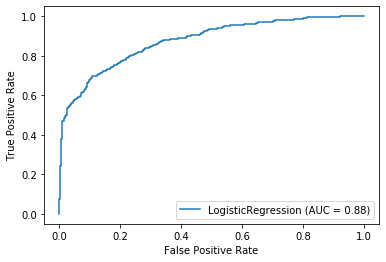

<Figure size 432x288 with 0 Axes>

In [36]:
#Plotting AUC adn saving image as a png file

metrics.plot_roc_curve(logmodel, X_test, y_test)  


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('AUC.png', dpi=100)

In [37]:
print(X_test)
print(y_test)

        pH  alcohol  residual sugar  fixed acidity  density
869   3.44     10.9             2.0            7.6  0.99578
3498  3.38     10.5             2.0            6.4  0.99273
3851  3.41     13.7             3.1            5.9  0.98913
4251  3.30      9.9             1.8            7.0  0.99251
594   2.97     10.8             1.0            6.4  0.99040
...    ...      ...             ...            ...      ...
1788  3.16     12.0             7.6            8.2  0.99390
4441  3.16     12.4             1.2            6.6  0.98918
1292  3.50     10.3             1.1            6.2  0.99300
915   3.27     11.9             2.2            8.6  0.99512
1404  3.43     10.7             2.6            8.0  0.99850

[1949 rows x 5 columns]
869     0.0
3498    1.0
3851    1.0
4251    1.0
594     1.0
       ... 
1788    1.0
4441    1.0
1292    1.0
915     0.0
1404    0.0
Name: white wine, Length: 1949, dtype: float64
